#Read Train Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_hire_stats.csv')
df_train.shape

(219600, 4)

In [3]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count
0,1,2016-02-01,0,0
1,1,2016-02-01,1,0
2,1,2016-02-01,2,0
3,1,2016-02-01,3,0
4,1,2016-02-01,4,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


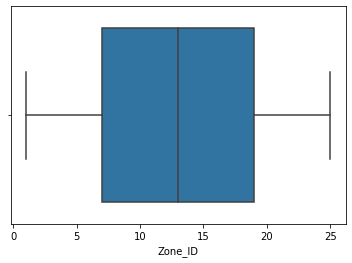

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Enter variable
#Box Plot for Zone_ID column
plt.figure() #make new figure
sns.boxplot(x=df_train['Zone_ID'])
plt.show()

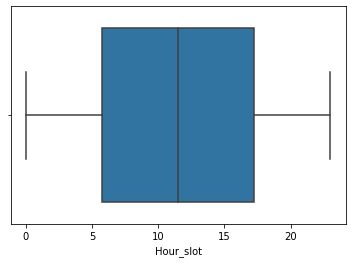

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Enter variable
#Box Plot for Hour_slot column
plt.figure() #make new figure
sns.boxplot(x=df_train['Hour_slot'])
plt.show()


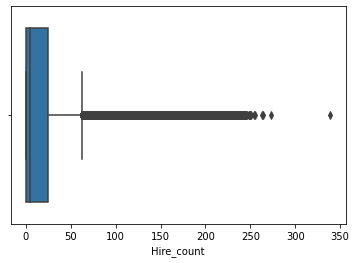

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Enter variable
#Box Plot for Hire_count column
plt.figure() #make new figure
sns.boxplot(x=df_train['Hire_count'])
plt.show()


In [7]:
#Handling Outlier menggunakan IQR
#Fungsi quantile untuk melihat nilai quantile tertentu
#Q1=(df_train[['Hire_count']]).quantile(0.25)
#Q3=(df_train[['Hire_count']]).quantile(0.9)

#IQR=Q3-Q1
#maximum= Q3+(1.5*IQR)
#print('Nilai Maximum dari masing-masing Variabel adalah:\n', maximum)
#minimum=Q1-(1.5*IQR)
#print('Nilai Minimum dari masing-masing Variabel adalah:\n', minimum)

#more_than=(df_train>maximum)
#lower_than=(df_train<minimum)
#Gunakan mask untuk mereplace nilai ketika kondisi nya adalah True
#Jadi ketika ada nilai yang melebihi maximum, nilainya akan direplace oleh nilai maximum yang sudah ditentukan
#df_train=df_train.mask(more_than, maximum,axis=1)
#df_train=df_train.mask(lower_than, minimum,axis=1)

#print('Persebaran data setelah melakukan handling pada Outlier:', df_train[['Hire_count']].describe())

In [8]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#Memasukkan variable
#Box Plot untuk kolom tenure
#plt.figure() #untuk membuat figure baru
#sns.boxplot(x=df_train['Hire_count'])
#plt.show()


#Converts date string

In [9]:
#Declare weekday & workday
isworkday = np.ones((len(df_train),), dtype=int)
weekday = np.ones((len(df_train),), dtype=int)

In [10]:
from datetime import datetime
for index, row in df_train.iterrows():
    dd=datetime.strptime(row['Date'], "%Y-%m-%d")
    weekday[index]= dd.weekday() 
    if weekday[index] >=5 :
        isworkday[index] = 0

#Build a new dataframe from the training data

In [11]:
#Build a new dataframe from the training data
RawX = pd.DataFrame(df_train[["Zone_ID", "Hour_slot"]])
RawX['isworkday'] = isworkday
RawX['weekday'] = weekday
RawX.head()

,Zone_ID,Hour_slot,isworkday,weekday
0,1,0,1,0
1,1,1,1,0
2,1,2,1,0
3,1,3,1,0
4,1,4,1,0


#One-Hot-Encoder

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#fit_transform

In [13]:
enc.fit_transform(RawX)
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6])]

#transform

In [14]:
#Transform data into one hot vector
X = enc.transform(RawX).toarray()
X.shape

(219600, 58)

In [15]:
#See the cooked input data
X[0:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]])

#Training a DNN model for prediction

#Resize y into (0,1)

In [16]:
#Resize y into (0,1)
y = df_train["Hire_count"].values/339.0
y.shape

(219600,)

#Define a DNN

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [18]:
# create and fit a Baseline Neural Network Model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=58))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.add(Dropout(0.1))
model.add(Dense(1))

#Compile and Train the model

In [19]:
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0067
Epoch 2/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0014
Epoch 3/50
215/215 [==============================] - 2s 10ms/step - loss: 0.0012
Epoch 4/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0011
Epoch 5/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0011
Epoch 6/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0010
Epoch 7/50
215/215 [==============================] - 2s 11ms/step - loss: 0.0010
Epoch 8/50
215/215 [==============================] - 2s 11ms/step - loss: 9.7709e-04
Epoch 9/50
215/215 [==============================] - 2s 10ms/step - loss: 9.7770e-04
Epoch 10/50
215/215 [==============================] - 2s 11ms/step - loss: 9.8302e-04
Epoch 11/50
215/215 [==============================] - 2s 11ms/step - loss: 9.6851e-04
Epoch 12/50
215/215 [==============================] - 2s 11ms/step - loss: 9.63

#Do the prediction

In [20]:
df_test = pd.read_csv('test_hire_stats.csv')
df_test.shape

(6048, 5)

#Convert to weekday

In [21]:
#Declare weekday & workday
isworkday2 = np.ones((len(df_test),), dtype=int)
weekday2 = np.ones((len(df_test),), dtype=int)

In [22]:
for index, row in df_test.iterrows():
    dd=datetime.strptime(row['Date'], "%Y-%m-%d")
    weekday2[index]= dd.weekday() 
    if weekday2[index] >=5:
        isworkday2[index] = 0

#One-hot encoding of test data

In [23]:
Test = pd.DataFrame(df_test[["Zone_ID", "Hour_slot"]])
Test['isworkday'] = isworkday2
Test['weekday'] = weekday2

In [24]:
Xtest = enc.transform(Test).toarray()
Xtest.shape

(6048, 58)

#Do prediction

In [25]:
yt = model.predict(Xtest)*339.0

#Output Result

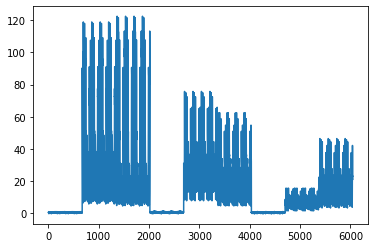

In [26]:
plt.plot(yt)

In [27]:
dfOut = pd.DataFrame(df_test)

In [28]:
for i in range(len(yt)):
  if yt[i] < 0.0:
    yt[i] = 0.0

In [29]:
dfOut['Hire_count'] = yt

In [30]:
dfOut.head()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
0,0,7,2017-02-01,0,0.309116
1,1,7,2017-02-01,1,0.441233
2,2,7,2017-02-01,2,0.360073
3,3,7,2017-02-01,3,0.115798
4,4,7,2017-02-01,4,0.309803


In [31]:
dfOut.to_csv('trialn9.csv', index=False)